# Road Segmentation

## Importing Libraries

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

## Reading Image

In [22]:
all_road_image_files = []
for root, dirs, files in os.walk('./desktop/road/'):
    for file in files:
        image_path = os.path.join(root, file)
        image_read = cv2.imread(image_path)
        image_read_to_rgb = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
        all_road_image_files.append(image_read_to_rgb)
#image = cv2.imread('image.png')
#img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plt.imshow(img)
#plt.show()

## Displaying first 5 images

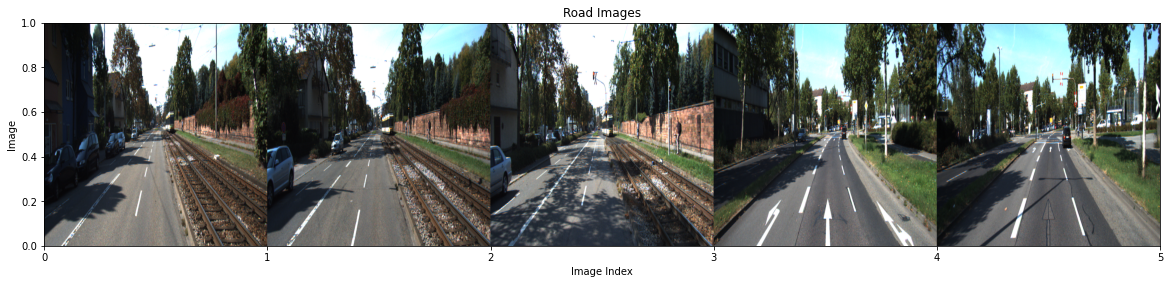

In [23]:
first_five_road_images = all_road_image_files[:5]
fig, ax = plt.subplots(figsize=(20, 10))
extent = [0, len(first_five_road_images), 0, 1]
ax.imshow(np.hstack(first_five_road_images), extent=extent)
ax.set_xlabel('Image Index')
ax.set_ylabel('Image')
ax.set_title('Road Images')
plt.show()

## Converting Image into GrayScale

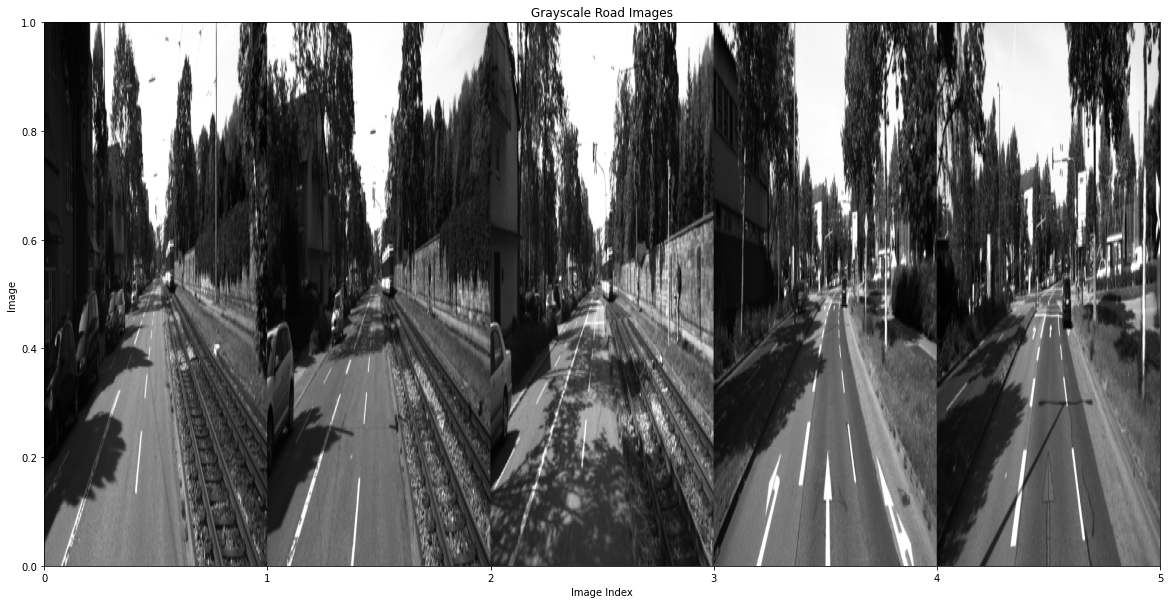

In [24]:
all_road_image_to_gray = []
for image in all_road_image_files:
    image_to_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    all_road_image_to_gray.append(image_to_gray)
all_road_image_to_gray_first_five = all_road_image_to_gray[:5]
fig, ax = plt.subplots(figsize=(20, 10))
extent = [0, len(all_road_image_to_gray_first_five), 0, 1]
ax.imshow(np.hstack(all_road_image_to_gray_first_five), cmap='gray', extent=extent, aspect='auto')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image')
ax.set_title('Grayscale Road Images')
plt.show()

# Thresholding

### Simple Threholding

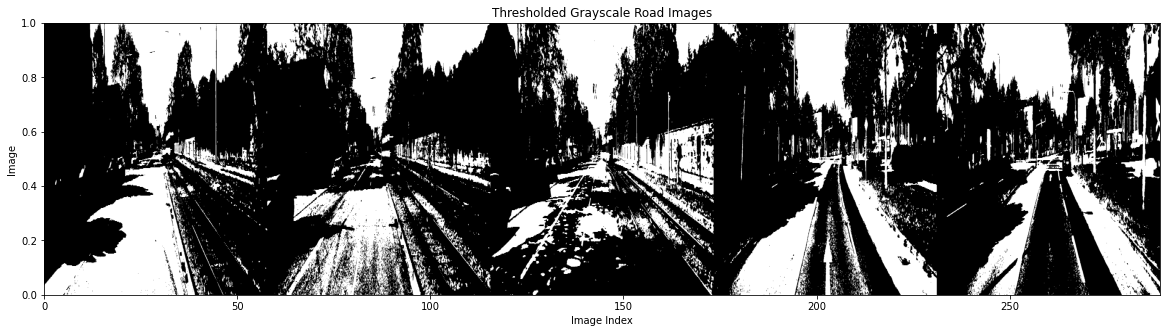

In [25]:
thresholded_images = []
for image in all_road_image_to_gray:
    _, thresholded_image = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY)
    thresholded_images.append(thresholded_image)
fig, ax = plt.subplots(figsize=(20, 5))
extent = [0, len(thresholded_images), 0, 1]
ax.imshow(np.hstack(thresholded_images[:5]), cmap='gray', extent=extent, aspect='auto')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image')
ax.set_title('Thresholded Grayscale Road Images')
plt.show()

### Binary Thresholding

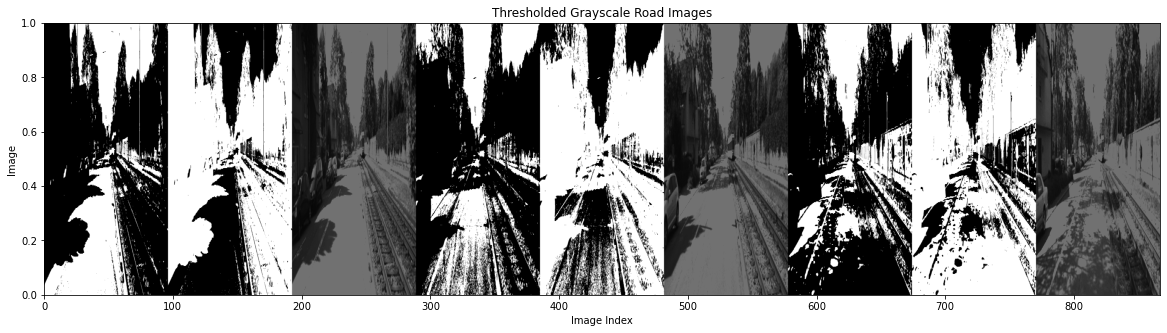

In [26]:
binary_thresholded_images = []
fig, ax = plt.subplots(figsize=(20, 5))
extent = [0, len(all_road_image_to_gray) * 3, 0, 1]
for i, image in enumerate(all_road_image_to_gray):
    ret, thresh1 = cv2.threshold(image, 110, 245, cv2.THRESH_BINARY)
    ret, thresh2 = cv2.threshold(image, 110, 245, cv2.THRESH_BINARY_INV)
    ret, thresh3 = cv2.threshold(image, 110, 245, cv2.THRESH_TRUNC)
    binary_thresholded_images.extend([thresh1, thresh2, thresh3])
    ax.imshow(np.hstack(binary_thresholded_images), cmap='gray', extent=extent, aspect='auto')
    if i == 2:
        break
ax.set_xlabel('Image Index')
ax.set_ylabel('Image')
ax.set_title('Thresholded Grayscale Road Images')
plt.show()

### Adaptive Thresholding

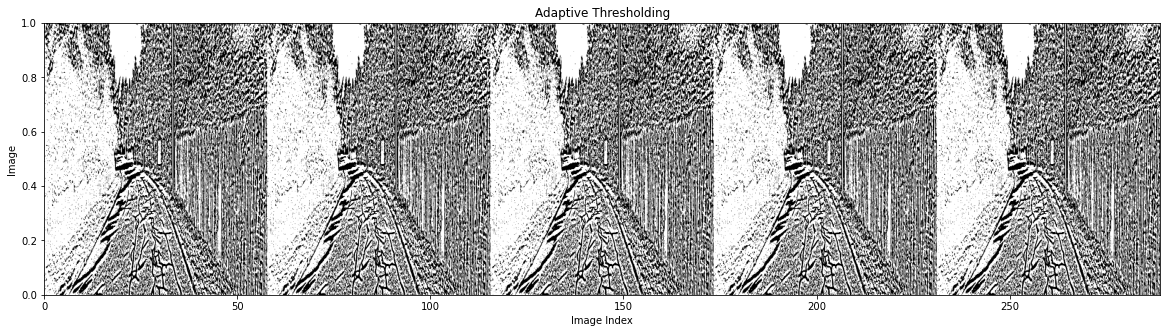

In [27]:
adaptive_thresholded_images = []
for image in all_road_image_to_gray:
    thresholded_image = cv2.adaptiveThreshold(image_to_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    adaptive_thresholded_images.append(thresholded_image)
fig, ax = plt.subplots(figsize=(20, 5))
extent = [0, len(adaptive_thresholded_images), 0, 1]
ax.imshow(np.hstack(adaptive_thresholded_images[:5]), cmap='gray', extent=extent, aspect='auto')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image')
ax.set_title('Adaptive Thresholding')
plt.show()

### Otsu Thresholding

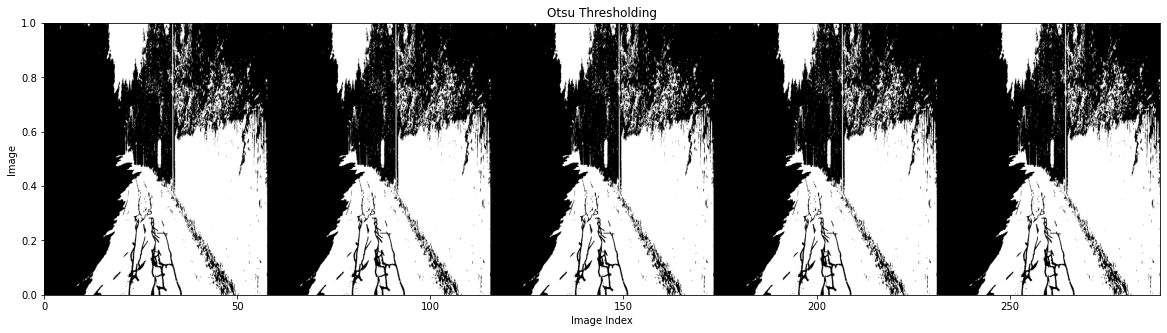

In [28]:
otsu_thresholded_images = []
for image in all_road_image_to_gray:
    _, thresholded_image = cv2.threshold(image_to_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    otsu_thresholded_images.append(thresholded_image)
fig, ax = plt.subplots(figsize=(20, 5))
extent = [0, len(otsu_thresholded_images), 0, 1]
ax.imshow(np.hstack(otsu_thresholded_images[:5]), cmap='gray', extent=extent, aspect='auto')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image')
ax.set_title('Otsu Thresholding')
plt.show()

## Clustering Based Segmentation

### KMeans

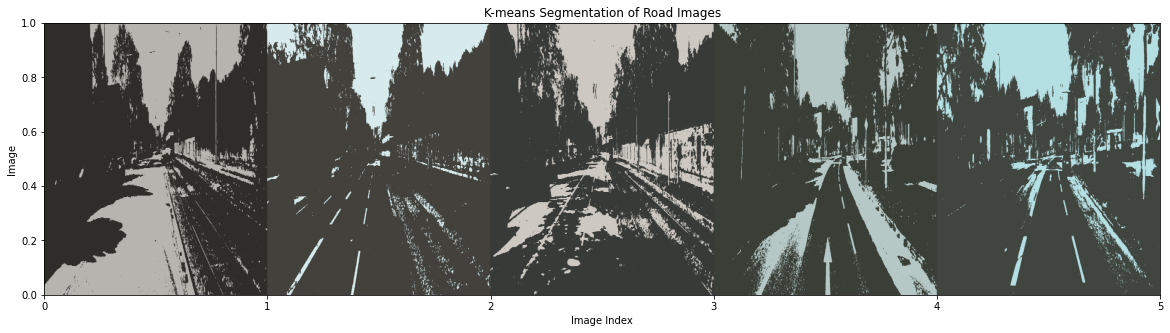

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
result_images = []
for image in first_five_road_images:
    twoDimage = image.reshape((-1, 3))
    twoDimage = np.float32(twoDimage)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    attempts = 10

    ret, label, center = cv2.kmeans(twoDimage, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape(image.shape)

    result_images.append(result_image)

extent = [0, len(result_images), 0, 1]
ax.imshow(np.hstack(result_images), extent=extent, aspect='auto')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image')
ax.set_title('K-means Segmentation of Road Images')
plt.show()

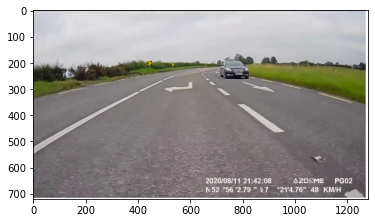

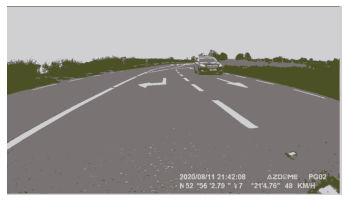

In [30]:
image = cv2.imread('./image.png')
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
#Preprocessing the image - converting image into 2diamension
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
#Defining Parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
plt.imshow(result_image)
plt.show()

## Edge-Based Segmentation

### Canny Edge Detection

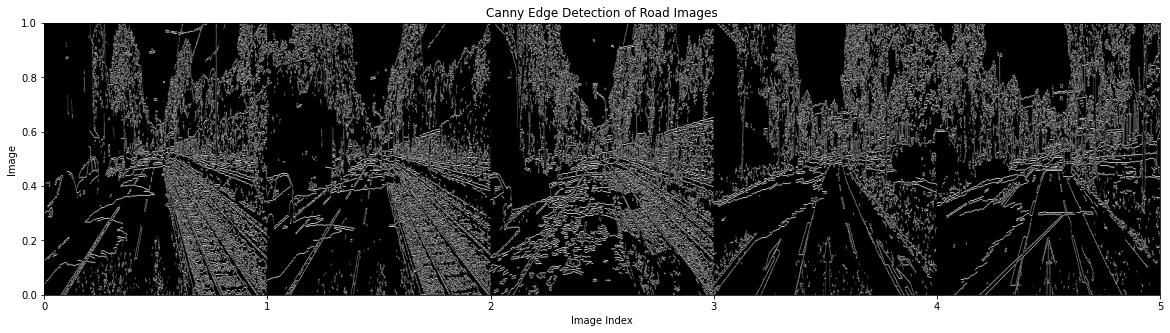

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))
edge_images = []
for image_to_gray in first_five_road_images:
    edges = cv2.Canny(image_to_gray, 100, 200)
    edge_images.append(edges)
extent = [0, len(edge_images), 0, 1]
ax.imshow(np.hstack(edge_images), extent=extent, aspect='auto', cmap = 'gray')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image')
ax.set_title('Canny Edge Detection of Road Images')
plt.show()

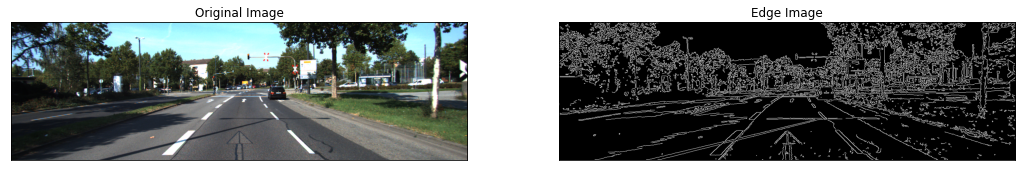

In [32]:
edges = cv2.Canny(image_to_gray,100,200)
plt.figure(figsize=(18, 4))
plt.subplot(121),plt.imshow(image_to_gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()